In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from bioinfokit.analys import stat

In [2]:
df = pd.read_csv('Project_1__CoffeeShopMenu.csv')

In [3]:
df

,Category,Beverage,Size,Milk,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
0,Coffee,Brewed Coffee,Short,None,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,Coffee,Brewed Coffee,Tall,None,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,Coffee,Brewed Coffee,Grande,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
3,Coffee,Brewed Coffee,Venti,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
4,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Whole Milk,260,4.0,2.0,0.1,10,190,53,0,52,4.0
234,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Soymilk,240,2.0,0.2,0.0,0,180,51,1,49,3.0
235,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Nonfat Milk,310,0.2,0.1,0.0,5,260,70,0,69,6.0
236,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      238 non-null    object 
 1   Beverage      238 non-null    object 
 2   Size          238 non-null    object 
 3   Milk          238 non-null    object 
 4   Calories      238 non-null    int64  
 5   TotalFat      238 non-null    float64
 6   TransFat      238 non-null    float64
 7   SaturatedFat  238 non-null    float64
 8   Sodium        238 non-null    int64  
 9   TotalCarb     238 non-null    int64  
 10  Cholesterol   238 non-null    int64  
 11  DietaryFibre  238 non-null    int64  
 12  Sugars        238 non-null    int64  
 13  Protein       238 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 26.2+ KB


In [4]:
df.Calories.mean()

193.8109243697479

In [12]:
df.Category.value_counts().mean()

26.444444444444443

Exploratory Data Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,238.0,193.810924,103.668135,0.0,120.0,185.0,260.00,510.0
TotalFat,238.0,2.931933,2.956133,0.0,0.2,2.5,4.50,15.0
TransFat,238.0,1.318908,1.648097,0.0,0.1,0.5,2.00,9.0
SaturatedFat,238.0,0.037815,0.071737,0.0,0.0,0.0,0.10,0.3
Sodium,238.0,6.407563,8.679348,0.0,0.0,5.0,10.00,40.0
TotalCarb,238.0,128.067227,82.656396,0.0,70.0,120.0,170.00,340.0
Cholesterol,238.0,35.878151,20.927388,0.0,21.0,34.0,50.75,90.0
DietaryFibre,238.0,0.815126,1.455189,0.0,0.0,0.0,1.00,8.0
Sugars,238.0,32.819328,19.838082,0.0,18.0,32.0,43.75,84.0
Protein,238.0,7.032773,4.893173,0.0,3.0,6.0,10.00,20.0


In [13]:
df.corr()

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Calories,1.000000,0.636476,0.645691,0.332305,0.388229,0.796933,0.940820,0.386000,0.911007,0.581001
TotalFat,0.636476,1.000000,0.889677,0.618044,0.585912,0.460300,0.379539,0.257285,0.338384,0.549996
TransFat,0.645691,0.889677,1.000000,0.693413,0.706656,0.533636,0.445614,0.129895,0.426742,0.496012
SaturatedFat,0.332305,0.618044,0.693413,1.000000,0.920493,0.242933,0.164689,-0.094424,0.182713,0.288548
Sodium,0.388229,0.585912,0.706656,0.920493,1.000000,0.294795,0.201423,-0.061158,0.208555,0.496262
TotalCarb,0.796933,0.460300,0.533636,0.242933,0.294795,1.000000,0.765836,0.178905,0.770051,0.419695
Cholesterol,0.940820,0.379539,0.445614,0.164689,0.201423,0.765836,1.000000,0.346333,0.984227,0.365335
DietaryFibre,0.386000,0.257285,0.129895,-0.094424,-0.061158,0.178905,0.346333,1.000000,0.188848,0.539622
Sugars,0.911007,0.338384,0.426742,0.182713,0.208555,0.770051,0.984227,0.188848,1.000000,0.268728
Protein,0.581001,0.549996,0.496012,0.288548,0.496262,0.419695,0.365335,0.539622,0.268728,1.000000


In [7]:
df.columns

Index(['Category', 'Beverage', 'Size', 'Milk', 'Calories', 'TotalFat',
       'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol',
       'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalFat', ylabel='SaturatedFat'>

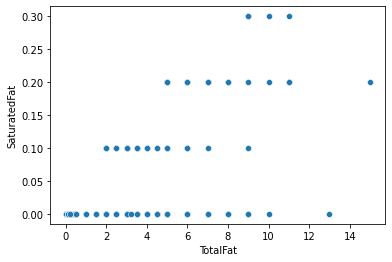

In [16]:
sns.scatterplot(df.TotalFat,df.SaturatedFat)

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

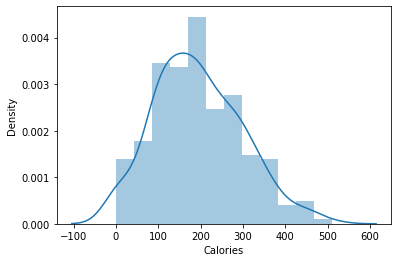

In [14]:
sns.distplot(df.Calories)

In [16]:
objnames=df.dtypes[df.dtypes=='object'].index
numnames=df.dtypes[df.dtypes!='object'].index

In [22]:
objnames

Index(['Category', 'Beverage', 'Size', 'Milk'], dtype='object')

In [29]:
len(numnames)

10

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

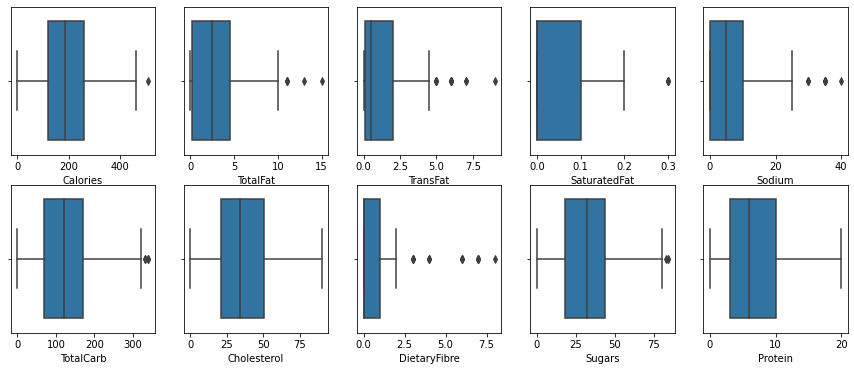

In [32]:
plt.figure(figsize=(15,6))
count=1
for i in numnames:
    plt.subplot(2,5,count)
    sns.boxplot(df.loc[:,i])
    count=count+1


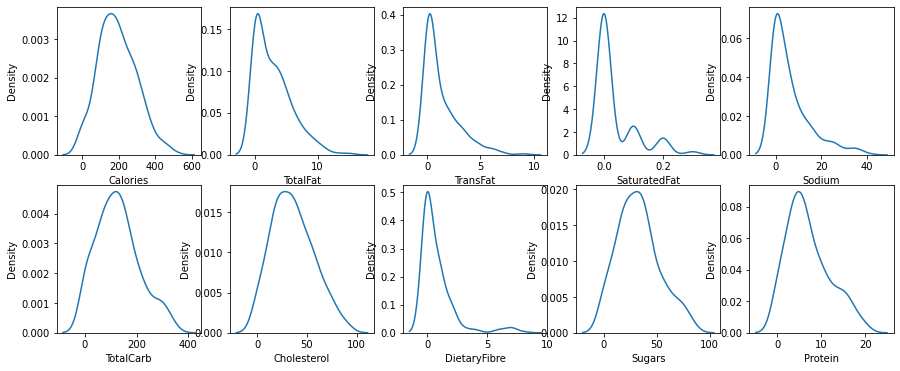

In [35]:
plt.figure(figsize=(15,6))
count=1
for i in numnames:
    plt.subplot(2,5,count)
    sns.kdeplot(df.loc[:,i])
    count+=1

In [36]:
objnames

Index(['Category', 'Beverage', 'Size', 'Milk'], dtype='object')

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Beverage'>

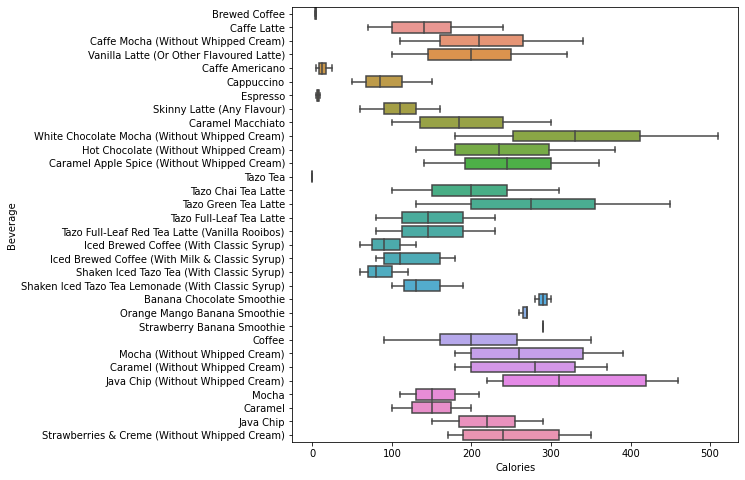

In [38]:
plt.figure(figsize=(8,8))
sns.boxplot(df.Calories,df.Beverage)

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Protein', ylabel='Beverage'>

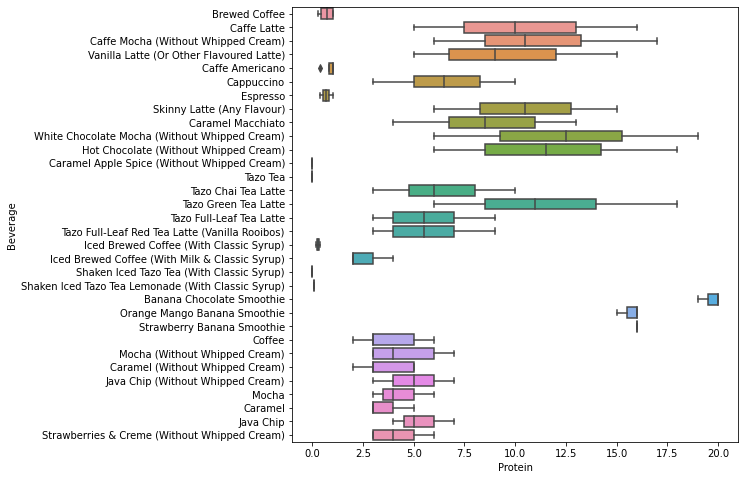

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(df.Protein,df.Beverage)

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Size'>

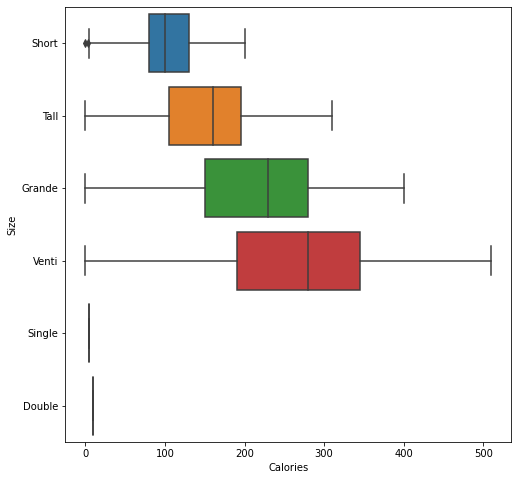

In [39]:
plt.figure(figsize=(8,8))
sns.boxplot(df.Calories,df.Size)

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Category'>

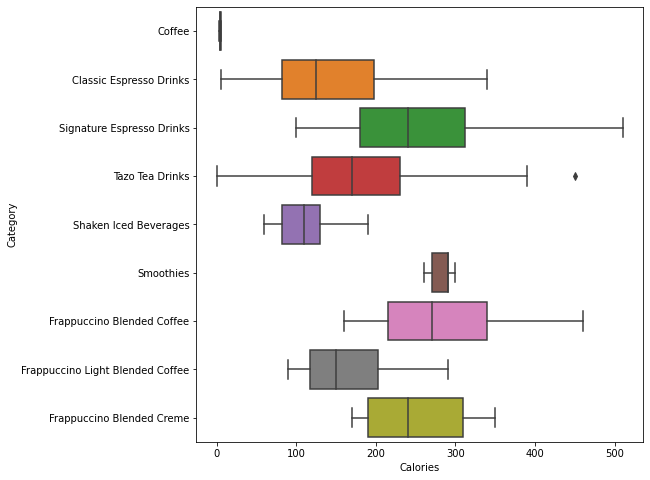

In [40]:
plt.figure(figsize=(8,8))
sns.boxplot(df.Calories,df.Category)

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Protein', ylabel='Category'>

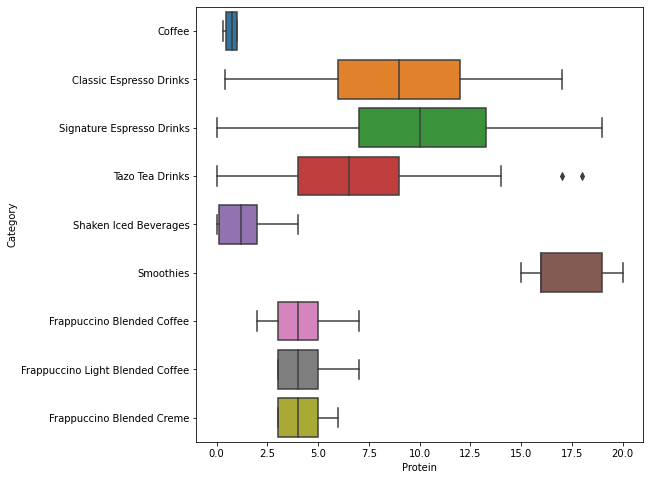

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(df.Protein,df.Category)

In [41]:
df.corr()

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Calories,1.000000,0.636476,0.645691,0.332305,0.388229,0.796933,0.940820,0.386000,0.911007,0.581001
TotalFat,0.636476,1.000000,0.889677,0.618044,0.585912,0.460300,0.379539,0.257285,0.338384,0.549996
TransFat,0.645691,0.889677,1.000000,0.693413,0.706656,0.533636,0.445614,0.129895,0.426742,0.496012
SaturatedFat,0.332305,0.618044,0.693413,1.000000,0.920493,0.242933,0.164689,-0.094424,0.182713,0.288548
Sodium,0.388229,0.585912,0.706656,0.920493,1.000000,0.294795,0.201423,-0.061158,0.208555,0.496262
TotalCarb,0.796933,0.460300,0.533636,0.242933,0.294795,1.000000,0.765836,0.178905,0.770051,0.419695
Cholesterol,0.940820,0.379539,0.445614,0.164689,0.201423,0.765836,1.000000,0.346333,0.984227,0.365335
DietaryFibre,0.386000,0.257285,0.129895,-0.094424,-0.061158,0.178905,0.346333,1.000000,0.188848,0.539622
Sugars,0.911007,0.338384,0.426742,0.182713,0.208555,0.770051,0.984227,0.188848,1.000000,0.268728
Protein,0.581001,0.549996,0.496012,0.288548,0.496262,0.419695,0.365335,0.539622,0.268728,1.000000


<AxesSubplot:>

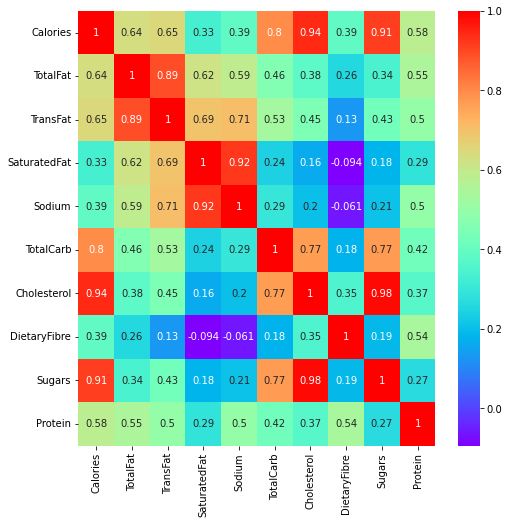

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

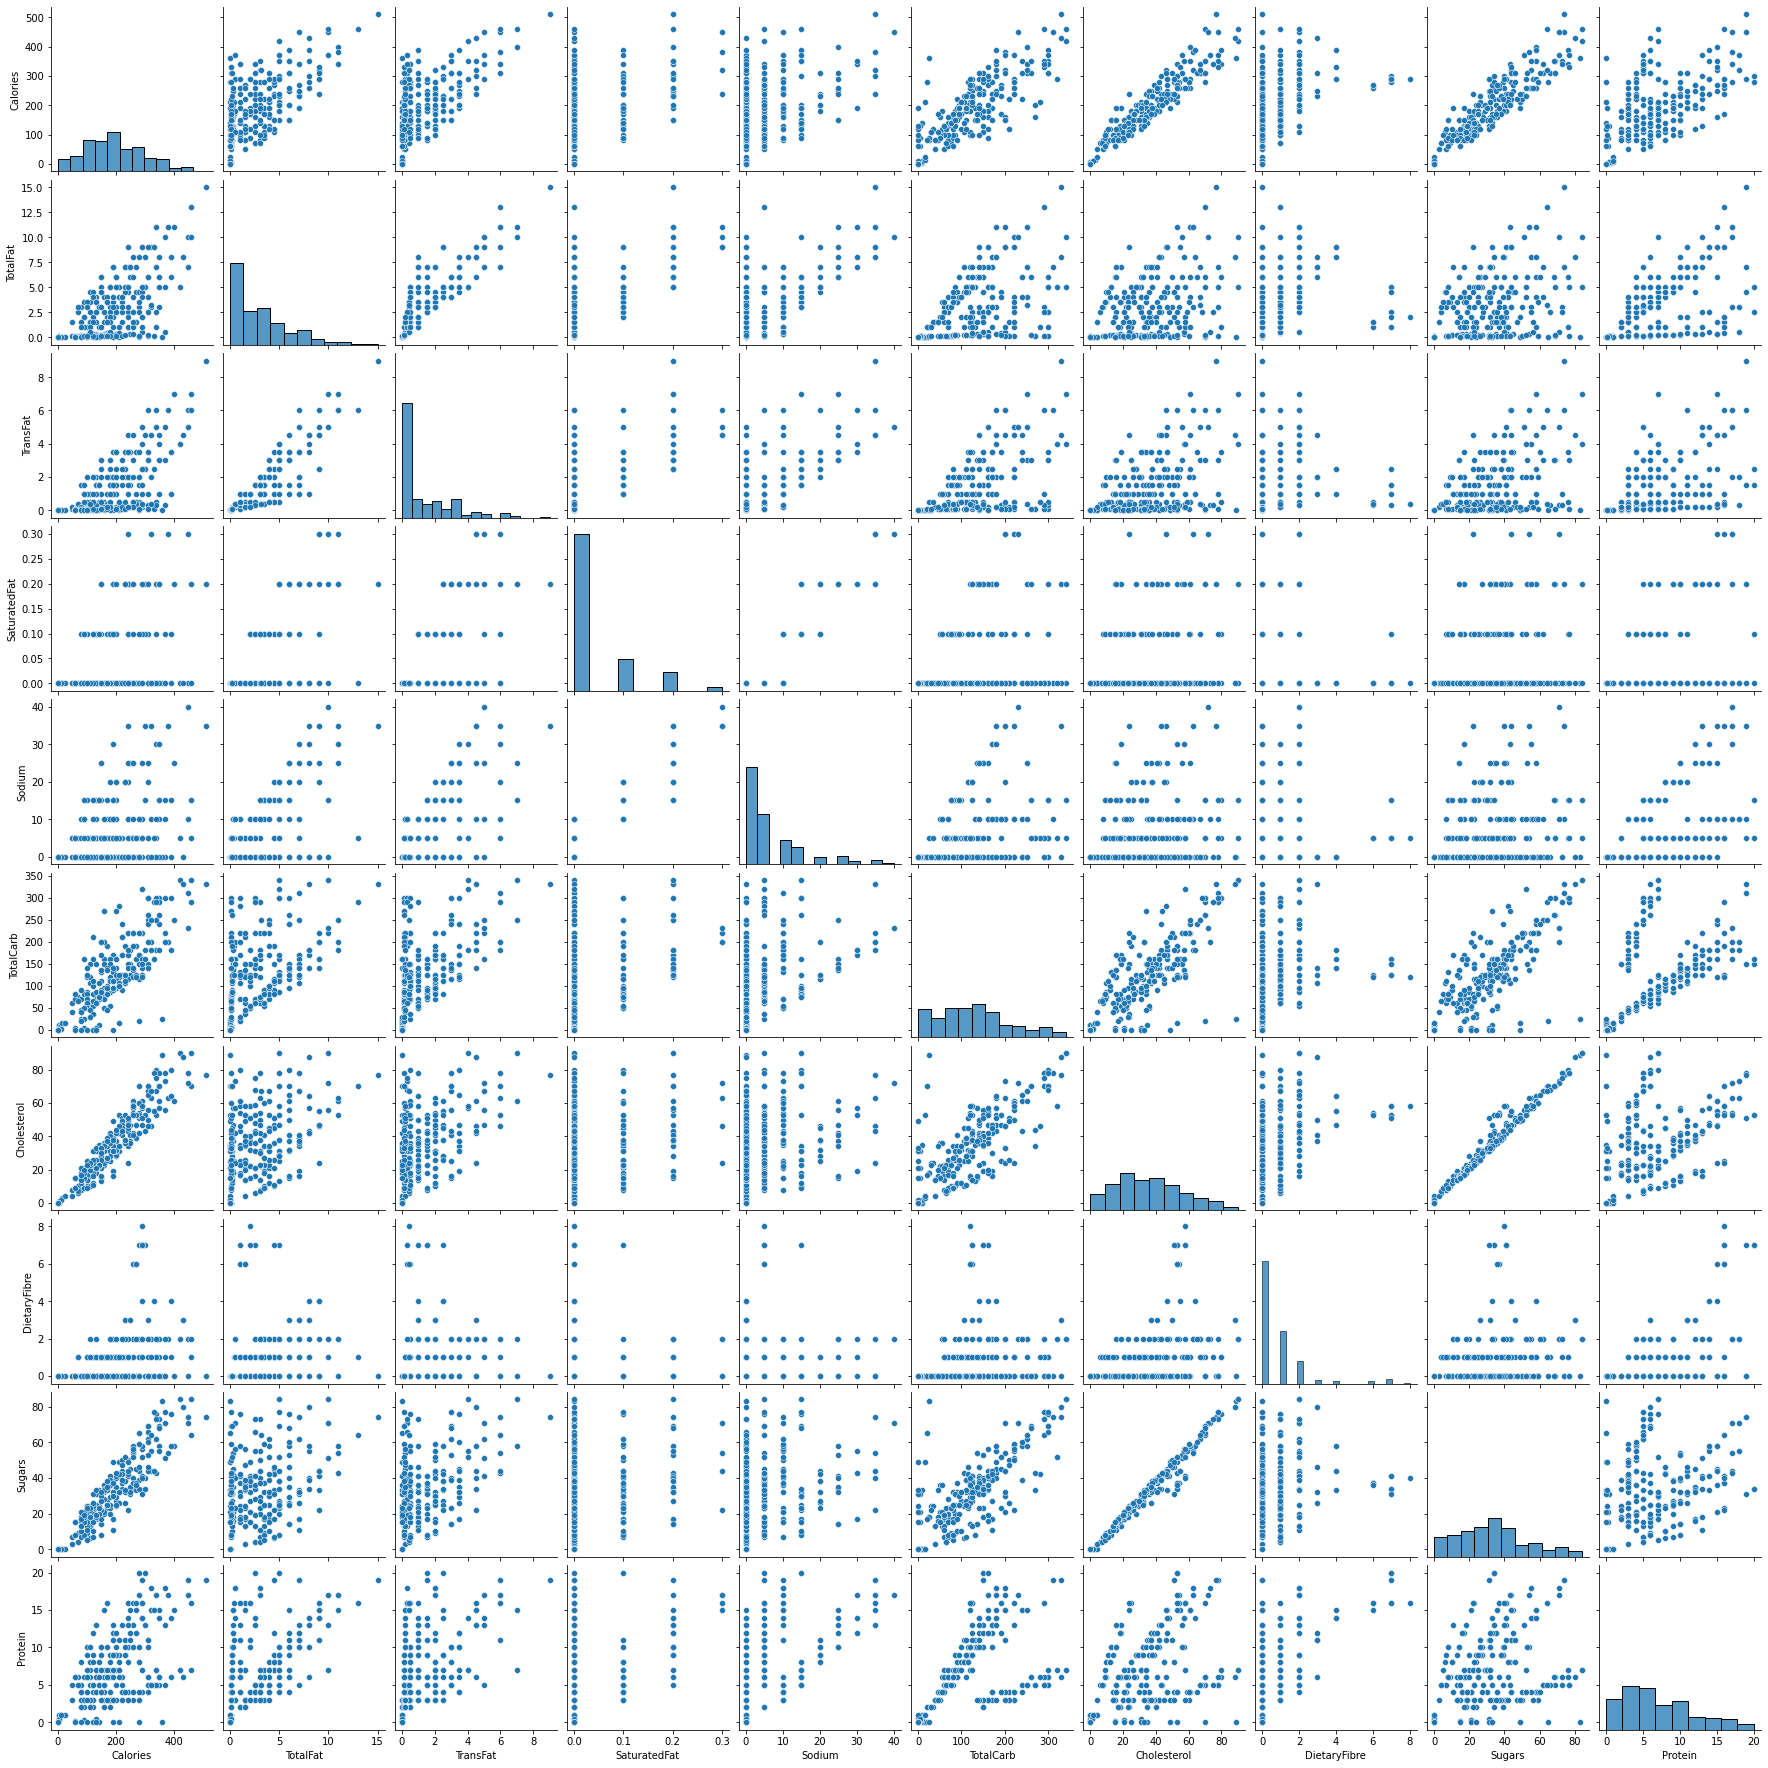

In [24]:
sns.pairplot(df)

In [43]:
df.Size.value_counts()

Grande    72
Tall      63
Venti     63
Short     38
Single     1
Double     1
Name: Size, dtype: int64

In [44]:
df.Milk.value_counts()

Nonfat Milk    81
Soymilk        65
2% Milk        50
None           27
Whole Milk     15
Name: Milk, dtype: int64

In [45]:
df.Category.value_counts()

Classic Espresso Drinks             58
Tazo Tea Drinks                     52
Signature Espresso Drinks           40
Frappuccino Blended Coffee          36
Shaken Iced Beverages               18
Frappuccino Light Blended Coffee    12
Smoothies                            9
Frappuccino Blended Creme            9
Coffee                               4
Name: Category, dtype: int64

In [46]:
df.Beverage.value_counts()

Tazo Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
Caffe Latte                                           12
Caffe Mocha (Without Whipped Cream)                   12
Vanilla Latte (Or Other Flavoured Latte)              12
Cappuccino                                            12
Caramel Macchiato                                     12
White Chocolate Mocha (Without Whipped Cream)         12
Hot Chocolate (Without Whipped Cream)                 12
Coffee                                                12
Tazo Chai Tea Latte                                   12
Tazo Green Tea Latte                                  12
Tazo Full-Leaf Tea Latte                              12
Java Chip (Without Whipped Cream)                      9
Caramel (Without Whipped Cream)                        9
Mocha (Without Whipped Cream)                          9
Iced Brewed Coffee (With Milk & Classic Syrup)         9
Strawberries & Creme (Without Whipped Cream)           9
Tazo Tea                       

In [50]:
df.groupby('Category').mean().sort_values('Calories',ascending=False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [53]:
df.groupby('Category').mean().sort_values('TotalFat',ascending=False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [54]:
df.groupby('Category').mean().sort_values('Protein',ascending=False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [55]:
pd.pivot_table(data=df,values='Calories',index='Category',columns='Milk',aggfunc='mean')

Milk,2% Milk,None,Nonfat Milk,Soymilk,Whole Milk
Category,,,,,
Classic Espresso Drinks,184.375000,11.666667,134.500000,151.250000,NaN
Coffee,NaN,4.250000,NaN,NaN,NaN
Frappuccino Blended Coffee,NaN,NaN,267.500000,268.333333,295.000000
Frappuccino Blended Creme,NaN,NaN,236.666667,243.333333,266.666667
Frappuccino Light Blended Coffee,NaN,NaN,162.500000,NaN,NaN
Shaken Iced Beverages,130.000000,106.666667,116.666667,120.000000,NaN
Signature Espresso Drinks,275.833333,247.500000,233.333333,241.666667,NaN
Smoothies,286.666667,NaN,276.666667,283.333333,NaN
Tazo Tea Drinks,211.875000,0.000000,175.625000,188.750000,NaN


In [56]:
df[df.Category=='Coffee']

,Category,Beverage,Size,Milk,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
0,Coffee,Brewed Coffee,Short,None,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,Coffee,Brewed Coffee,Tall,None,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,Coffee,Brewed Coffee,Grande,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
3,Coffee,Brewed Coffee,Venti,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0


Anova

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Milk'>

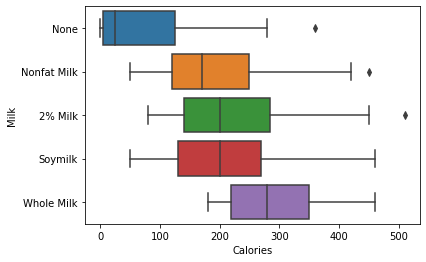

In [57]:
sns.boxplot(df.Calories,df.Milk)

In [19]:
formula = 'Calories ~ C(Milk)'
model=ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq        mean_sq          F        PR(>F)
C(Milk)     4.0  5.584364e+05  139609.099632  16.357517  7.975236e-12
Residual  233.0  1.988622e+06    8534.858769        NaN           NaN


In [20]:
dfnew=df[df.Milk != 'None']
dfnew.shape,df.shape

((211, 14), (238, 14))

In [21]:
dfnew

,Category,Beverage,Size,Milk,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
4,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0
5,Classic Espresso Drinks,Caffe Latte,Short,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0
6,Classic Espresso Drinks,Caffe Latte,Short,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0
7,Classic Espresso Drinks,Caffe Latte,Tall,Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0
8,Classic Espresso Drinks,Caffe Latte,Tall,2% Milk,150,6.0,3.0,0.2,25,135,15,0,14,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Whole Milk,260,4.0,2.0,0.1,10,190,53,0,52,4.0
234,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Soymilk,240,2.0,0.2,0.0,0,180,51,1,49,3.0
235,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Nonfat Milk,310,0.2,0.1,0.0,5,260,70,0,69,6.0
236,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0


In [64]:
df.Milk != 'None'

0      False
1      False
2      False
3      False
4       True
       ...  
233     True
234     True
235     True
236     True
237     True
Name: Milk, Length: 238, dtype: bool

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Milk'>

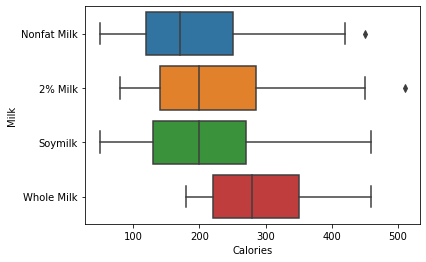

In [22]:
sns.boxplot(dfnew.Calories,dfnew.Milk)

In [66]:
formula= 'Calories ~ C(Milk)'
model = ols(formula,dfnew).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq       mean_sq         F    PR(>F)
C(Milk)     3.0  1.317432e+05  43914.396571  5.184292  0.001789
Residual  207.0  1.753427e+06   8470.663896       NaN       NaN


In [70]:
####which type of milk is lower in calories and higher in calories
res = stat()
res.tukey_hsd(dfnew,res_var='Calories',xfac_var='Milk',anova_model='Calories ~ C(Milk)')
res.tukey_summary

/home/pendlimarri/.local/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Nonfat Milk,2% Milk,28.493827,-14.380041,71.367696,2.434439,0.315317
1,Nonfat Milk,Soymilk,18.186135,-21.511239,57.883509,1.678106,0.620007
2,Nonfat Milk,Whole Milk,99.827160,32.818334,166.835987,5.457045,0.001000
3,2% Milk,Soymilk,10.307692,-34.535010,55.150395,0.841997,0.900000
4,2% Milk,Whole Milk,71.333333,1.153783,141.512884,3.723255,0.044752
5,Soymilk,Whole Milk,81.641026,13.355726,149.926326,4.379475,0.011860


/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Milk'>

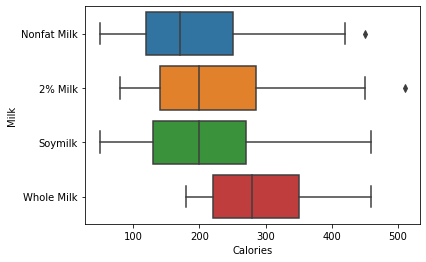

In [71]:
sns.boxplot(dfnew.Calories,dfnew.Milk)

 Linear Regression

In [72]:
df.columns

Index(['Category', 'Beverage', 'Size', 'Milk', 'Calories', 'TotalFat',
       'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol',
       'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

In [79]:
formula = 'Calories ~ Category + Beverage + Size + Milk + TotalFat + TransFat + SaturatedFat + Sodium + TotalCarb + Cholesterol + DietaryFibre +Sugars + Protein'
lm = smf.ols(formula=formula,data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2673.
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.27e-244
Time:                        16:38:42   Log-Likelihood:                -665.69
No. Observations:                 238   AIC:                             1429.
Df Residuals:                     189   BIC:                             1600.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [17]:
formula= 'Calories ~ TotalFat + Sugars + Protein'
lm=smf.ols(formula=formula,data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     9152.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.42e-242
Time:                        03:59:30   Log-Likelihood:                -873.77
No. Observations:                 238   AIC:                             1756.
Df Residuals:                     234   BIC:                             1769.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7872      1.365      1.309      0.1

In [4]:
formula= 'Calories ~ TransFat + Sugars + Protein'
lm=smf.ols(formula=formula,data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2820.
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          2.50e-183
Time:                        20:27:06   Log-Likelihood:                -1011.6
No. Observations:                 238   AIC:                             2031.
Df Residuals:                     234   BIC:                             2045.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1205      2.472      2.476      0.0

In [12]:
6.12+11.3*0.5+4+6.1

21.869999999999997

In [8]:
6.12+11.3*0.1+4*9+6.1*6

79.85

In [10]:
1/2

0.5

In [18]:
0.992**2

0.9840639999999999

In [13]:
pred = lm.predict(df)

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories'>

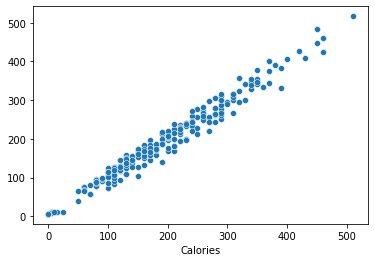

In [14]:
sns.scatterplot(df.Calories,pred)

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories'>

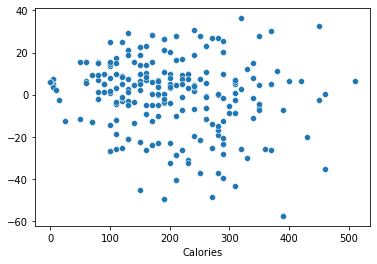

In [15]:
sns.scatterplot(df.Calories,pred-df.Calories)

<AxesSubplot:ylabel='Density'>

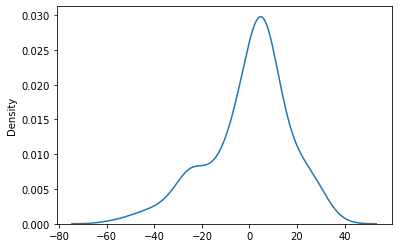

In [16]:
sns.kdeplot(pred-df.Calories)